In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator, SparsePauliOp
from vqls_prototype import VQLS, VQLSLog
from vqls_prototype.vqls_mo import VQLS_MO
from vqls_prototype import PauliDecomposition
from qiskit.primitives import Estimator, Sampler 
from vqls_prototype.direct_hadamard_test import BatchDirectHadammardTest
from vqls_prototype.hadamard_test import BatchHadammardTest
from vqls_prototype.optimized_matrix_decomposition import OptimizedPauliDecomposition, ContractedPauliDecomposition

In [17]:
from qiskit.circuit.library.n_local.real_amplitudes import RealAmplitudes, RYGate
from qiskit.circuit.library.n_local.efficient_su2 import EfficientSU2
num_qubits = 2
ansatz = RealAmplitudes(num_qubits, entanglement='full', reps=1, insert_barriers=False)

num_parameters = ansatz.num_parameters
parameters = 4*np.pi*np.random.rand(num_parameters)

In [18]:
ansatz.decompose().draw()

┌──────────┐     ┌──────────┐
q_0: ┤ Ry(θ[0]) ├──■──┤ Ry(θ[2]) ├
     ├──────────┤┌─┴─┐├──────────┤
q_1: ┤ Ry(θ[1]) ├┤ X ├┤ Ry(θ[3]) ├
     └──────────┘└───┘└──────────┘

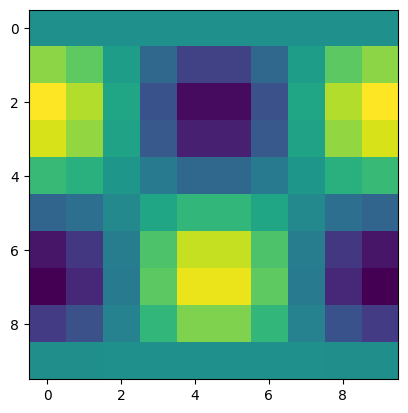

In [50]:
out = []
pvals = np.linspace(0,4*np.pi,10)
for p1 in pvals:
    for p2 in pvals:

        R0 = QuantumCircuit(2)
        R0.ry(p1,0)
        R0.ry(p2,1)
        out.append(Operator(R0).data@np.array([1,0,0,0]))
out = np.array(out).reshape(10,10,4) .real
plt.imshow(out[:,:,1]) 


In [39]:
print(Operator(R0).data.real)

[[ 0.20009871  0.13792462  0.79867117  0.55051038]
 [-0.13792462  0.20009871 -0.55051038  0.79867117]
 [-0.79867117 -0.55051038  0.20009871  0.13792462]
 [ 0.55051038 -0.79867117 -0.13792462  0.20009871]]


In [40]:
print(Operator(RYGate(parameters[0])).data)
print(Operator(RYGate(parameters[1])).data)

out0 = Operator(R0).data@np.array([1,0,0,0])
print(out0)

[[ 0.82335601+0.j  0.56752522+0.j]
 [-0.56752522+0.j  0.82335601+0.j]]
[[ 0.24302818+0.j  0.97001923+0.j]
 [-0.97001923+0.j  0.24302818+0.j]]
[ 0.20009871+0.j -0.13792462+0.j -0.79867117+0.j  0.55051038+0.j]


In [41]:
EM = QuantumCircuit(2)
EM.cx(0,1)

Operator(EM).data @ out0

array([ 0.20009871+0.j,  0.55051038+0.j, -0.79867117+0.j, -0.13792462+0.j])